<a href="https://colab.research.google.com/github/ToshikiShimizu/PyTorch/blob/master/intro_dev/chapter3/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [0]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
    
)

In [0]:
from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
Y = digits.target

X = torch.tensor(X,dtype=torch.float32)
Y = torch.tensor(Y,dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters())

losses = []

for epoc in range(500):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  

In [0]:
from torch.utils.data import TensorDataset, DataLoader

In [0]:
ds = TensorDataset(X,Y)
loader = DataLoader(ds, batch_size=64,shuffle=True)
net = nn.Sequential(
  nn.Linear(64,32),
  nn.ReLU(),
  nn.Linear(32,16),
  nn.ReLU(),
  nn.Linear(16,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

losses = []
for epoch in range(10):
  running_loss = 0.0
  for xx, yy in loader:
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss)

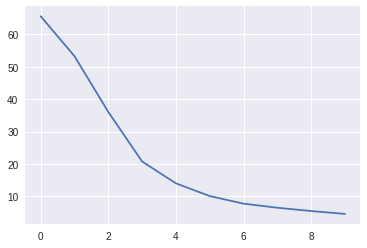

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [0]:
from sklearn.model_selection import train_test_split
X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train,dtype = torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test,dtype = torch.int64)


In [0]:
k = 100
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size=32,shuffle=True)